# Implementation of word embedding

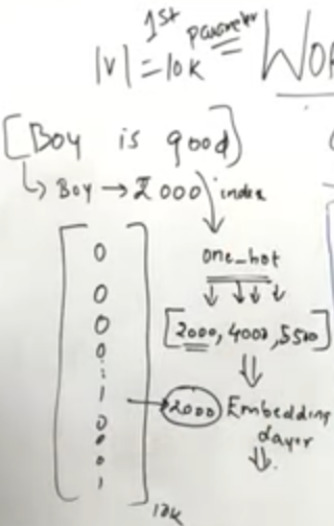

v stands for vocabulary. Suppose a sentence is given like boy is good(as shown in img). Suppose boy is 
at 2000 index. When u perform one hot encoding for boy then only at 2000 index value will be 1, for rest 
it will be 0 as shown.

Basically in keras one hot gives u index no's for which u further pass into embedded layers. Embedded layers
helps you to convert those indexes to vectors which u need to pass into n-dimensions for each word.

Embedding layers are basically creating feature extraction for each word.

# Word Embedding Techniques using Embedding layer in keras

**tensorflow version >2.0:-** In that keras is integrated within tensorflow

**tensorflow version <2.0:-** u need to install keras n tensorflow separately.

In [1]:
from tensorflow.keras.preprocessing.text import one_hot

2025-08-03 01:06:23.373782: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-03 01:06:24.783673: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-03 01:06:25.489571: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754163386.214531    6175 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754163386.386250    6175 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1754163387.821778    6175 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [2]:
### sentences
sent=[  'the glass of milk',
     'the glass of juice',
     'the cup of tea',
    'I am a good boy',
     'I am a good developer',
     'understand the meaning of words',
     'your videos are good',]

In [3]:
sent

['the glass of milk',
 'the glass of juice',
 'the cup of tea',
 'I am a good boy',
 'I am a good developer',
 'understand the meaning of words',
 'your videos are good']

In [4]:
### Vocabulary size
voc_size=10000

# One-hot representation

In [5]:
onehot_repr=[one_hot(words,voc_size)for words in sent] 
print(onehot_repr)

[[4929, 9344, 5090, 9869], [4929, 9344, 5090, 6461], [4929, 3982, 5090, 228], [804, 1169, 1389, 2215, 5742], [804, 1169, 1389, 2215, 4255], [5036, 4929, 5152, 5090, 2271], [7941, 2931, 8840, 2215]]


# Word Embedding Representation

In [6]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences #all the sentences should have same no. of words
#or size of sentences should be same

In [7]:
import numpy as np

In [8]:
sent_length=8
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length) #pre will add 0 before to make size of 8
print(embedded_docs)

[[   0    0    0    0 4929 9344 5090 9869]
 [   0    0    0    0 4929 9344 5090 6461]
 [   0    0    0    0 4929 3982 5090  228]
 [   0    0    0  804 1169 1389 2215 5742]
 [   0    0    0  804 1169 1389 2215 4255]
 [   0    0    0 5036 4929 5152 5090 2271]
 [   0    0    0    0 7941 2931 8840 2215]]


In [9]:
dim=10 # or features count

In [10]:
model=Sequential()
model.add(Embedding(voc_size,10,input_length=sent_length))
model.compile('adam', 'mse')

/home/kashika/anaconda3/lib/python3.9/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
2025-08-03 01:07:01.969146: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
print(model.predict(embedded_docs))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 719ms/step
[[[ 3.39615010e-02 -4.91189137e-02 -1.00953355e-02 -1.87797081e-02
    1.43944100e-03 -2.83396840e-02 -3.26894149e-02 -1.78527348e-02
    8.56896490e-03 -3.24965715e-02]
  [ 3.39615010e-02 -4.91189137e-02 -1.00953355e-02 -1.87797081e-02
    1.43944100e-03 -2.83396840e-02 -3.26894149e-02 -1.78527348e-02
    8.56896490e-03 -3.24965715e-02]
  [ 3.39615010e-02 -4.91189137e-02 -1.00953355e-02 -1.87797081e-02
    1.43944100e-03 -2.83396840e-02 -3.26894149e-02 -1.78527348e-02
    8.56896490e-03 -3.24965715e-02]
  [ 3.39615010e-02 -4.91189137e-02 -1.00953355e-02 -1.87797081e-02
    1.43944100e-03 -2.83396840e-02 -3.26894149e-02 -1.78527348e-02
    8.56896490e-03 -3.24965715e-02]
  [ 1.91437118e-02 -4.20569666e-02  1.82980299e-03 -3.75085585e-02
   -2.26024520e-02 -3.86053100e-02  4.63953726e-02  1.92115791e-02
   -2.79376395e-02 -2.12668907e-02]
  [ 3.38340923e-03  4.41604964e-02  9.68028232e-03 -3.70367877e-02
    1.42076649e-02 -1.88536886e-02 -2.091008

In [13]:
embedded_docs[0]

array([   0,    0,    0,    0, 4929, 9344, 5090, 9869], dtype=int32)

In [14]:
print(model.predict(embedded_docs)[0])#each word is splitted into 10 dimensions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[ 0.0339615  -0.04911891 -0.01009534 -0.01877971  0.00143944 -0.02833968
  -0.03268941 -0.01785273  0.00856896 -0.03249657]
 [ 0.0339615  -0.04911891 -0.01009534 -0.01877971  0.00143944 -0.02833968
  -0.03268941 -0.01785273  0.00856896 -0.03249657]
 [ 0.0339615  -0.04911891 -0.01009534 -0.01877971  0.00143944 -0.02833968
  -0.03268941 -0.01785273  0.00856896 -0.03249657]
 [ 0.0339615  -0.04911891 -0.01009534 -0.01877971  0.00143944 -0.02833968
  -0.03268941 -0.01785273  0.00856896 -0.03249657]
 [ 0.01914371 -0.04205697  0.0018298  -0.03750856 -0.02260245 -0.03860531
   0.04639537  0.01921158 -0.02793764 -0.02126689]
 [ 0.00338341  0.0441605   0.00968028 -0.03703679  0.01420766 -0.01885369
  -0.02091008  0.04433751 -0.04102384  0.01617524]
 [ 0.04468037 -0.04455023  0.01491169  0.04064727 -0.0426497   0.04418332
   0.03684436  0.04060661 -0.00812749  0.04514888]
 [ 0.03109996  0.03776517 -0.0054073  -0.04375333  0.00290922 -0.03215022
   0.02848792